In [22]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import time


In [23]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [24]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [25]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [26]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

616

In [27]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [28]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

Beginning Data Retrieval     
-----------------------------


In [29]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_keys

In [30]:
#Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=27439cb68d937b0561cdc51ac06bf47c"
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=27439cb68d937b0561cdc51ac06bf47c


In [31]:
# Loop through all the cities in our list.
for i in range(len(cities)):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + "i"

In [32]:
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")
   

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1

    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
    
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")     
                    
                        

Processing Record 1 of Set 13 | taolanaro
City not found. Skipping...
Processing Record 2 of Set 13 | albany
Processing Record 3 of Set 13 | half moon bay
Processing Record 4 of Set 13 | ushuaia
Processing Record 5 of Set 13 | el alto
Processing Record 6 of Set 13 | gondanglegi
Processing Record 7 of Set 13 | punta arenas
Processing Record 8 of Set 13 | pokosnoye
Processing Record 9 of Set 13 | puerto ayora
Processing Record 10 of Set 13 | arraial do cabo
Processing Record 11 of Set 13 | hobart
Processing Record 12 of Set 13 | tuktoyaktuk
Processing Record 13 of Set 13 | victoria
Processing Record 14 of Set 13 | hailar
Processing Record 15 of Set 13 | vaini
Processing Record 16 of Set 13 | rikitea
Processing Record 17 of Set 13 | hithadhoo
Processing Record 18 of Set 13 | severo-kurilsk
Processing Record 19 of Set 13 | kyle of lochalsh
City not found. Skipping...
Processing Record 20 of Set 13 | smidovich
Processing Record 21 of Set 13 | talah
City not found. Skipping...
Processing Rec

Processing Record 33 of Set 16 | yenagoa
Processing Record 34 of Set 16 | chernyshevskiy
Processing Record 35 of Set 16 | pevek
Processing Record 36 of Set 16 | san jorge
Processing Record 37 of Set 16 | gundsomagle
Processing Record 38 of Set 16 | bluff
Processing Record 39 of Set 16 | guangyuan
Processing Record 40 of Set 16 | hamadan
Processing Record 41 of Set 16 | fort nelson
Processing Record 42 of Set 16 | longyearbyen
Processing Record 43 of Set 16 | thongwa
Processing Record 44 of Set 16 | sorland
Processing Record 45 of Set 16 | storforshei
Processing Record 46 of Set 16 | bonavista
Processing Record 47 of Set 16 | saint george
Processing Record 48 of Set 16 | jinan
Processing Record 49 of Set 16 | foam lake
Processing Record 50 of Set 16 | kriel
Processing Record 1 of Set 17 | pangai
Processing Record 2 of Set 17 | concordia
Processing Record 3 of Set 17 | durusu
Processing Record 4 of Set 17 | taoudenni
Processing Record 5 of Set 17 | ayni
Processing Record 6 of Set 17 | ma

City not found. Skipping...
Processing Record 24 of Set 20 | hasaki
Processing Record 25 of Set 20 | taksimo
Processing Record 26 of Set 20 | ormara
Processing Record 27 of Set 20 | moose factory
Processing Record 28 of Set 20 | sorong
Processing Record 29 of Set 20 | bengkulu
Processing Record 30 of Set 20 | novopokrovka
Processing Record 31 of Set 20 | marsh harbour
Processing Record 32 of Set 20 | codrington
Processing Record 33 of Set 20 | eyl
Processing Record 34 of Set 20 | kindersley
Processing Record 35 of Set 20 | dawlatabad
Processing Record 36 of Set 20 | wageningen
Processing Record 37 of Set 20 | kutum
Processing Record 38 of Set 20 | aksha
Processing Record 39 of Set 20 | elk city
Processing Record 40 of Set 20 | margate
Processing Record 41 of Set 20 | buarcos
Processing Record 42 of Set 20 | arkadak
Processing Record 43 of Set 20 | axim
Processing Record 44 of Set 20 | mapastepec
Processing Record 45 of Set 20 | te anau
Processing Record 46 of Set 20 | beroroha
Processi

Processing Record 11 of Set 24 | tambopata
Processing Record 12 of Set 24 | moses lake
Processing Record 13 of Set 24 | sargatskoye
Processing Record 14 of Set 24 | pankovka
Processing Record 15 of Set 24 | lisakovsk
Processing Record 16 of Set 24 | piacabucu
Processing Record 17 of Set 24 | walvis bay
Processing Record 18 of Set 24 | thio
Processing Record 19 of Set 24 | libertador general san martin
Processing Record 20 of Set 24 | filadelfia
Processing Record 21 of Set 24 | dakar
Processing Record 22 of Set 24 | nouakchott
Processing Record 23 of Set 24 | nacala
Processing Record 24 of Set 24 | nizhnevartovsk
Processing Record 25 of Set 24 | palauig
Processing Record 26 of Set 24 | vila velha
Processing Record 27 of Set 24 | oranjemund
Processing Record 28 of Set 24 | vreed en hoop
City not found. Skipping...
Processing Record 29 of Set 24 | opuwo
Processing Record 30 of Set 24 | benin
Processing Record 31 of Set 24 | tessalit
Processing Record 32 of Set 24 | sisimiut
Processing Rec

In [36]:
len(city_data)

573

In [37]:
#Convert the array of dictionaries to a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Albany,42.60,-73.97,60.01,73,100,5.97,US,2020-10-19 19:11:17
1,Half Moon Bay,37.46,-122.43,75.00,68,1,12.75,US,2020-10-19 19:15:38
2,Ushuaia,-54.80,-68.30,39.20,86,75,33.33,AR,2020-10-19 19:16:12
3,El Alto,-4.27,-81.21,75.20,69,94,17.22,PE,2020-10-19 19:20:52
4,Gondanglegi,-7.75,112.01,76.03,83,100,1.90,ID,2020-10-19 19:20:52
5,Punta Arenas,-53.15,-70.92,46.40,61,100,40.26,CL,2020-10-19 19:16:11
6,Pokosnoye,55.53,101.05,26.38,90,89,13.53,RU,2020-10-19 19:20:53
7,Puerto Ayora,-0.74,-90.35,78.80,69,75,13.87,EC,2020-10-19 19:16:08
8,Arraial Do Cabo,-22.97,-42.03,77.00,69,40,16.11,BR,2020-10-19 19:16:15
9,Hobart,-42.88,147.33,44.60,87,44,9.17,AU,2020-10-19 19:14:47


In [35]:
#Change the order of the columns
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Albany,US,2020-10-19 19:11:17,42.60,-73.97,60.01,73,100,5.97
1,Half Moon Bay,US,2020-10-19 19:15:38,37.46,-122.43,75.00,68,1,12.75
2,Ushuaia,AR,2020-10-19 19:16:12,-54.80,-68.30,39.20,86,75,33.33
3,El Alto,PE,2020-10-19 19:20:52,-4.27,-81.21,75.20,69,94,17.22
4,Gondanglegi,ID,2020-10-19 19:20:52,-7.75,112.01,76.03,83,100,1.90


In [38]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")


In [39]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

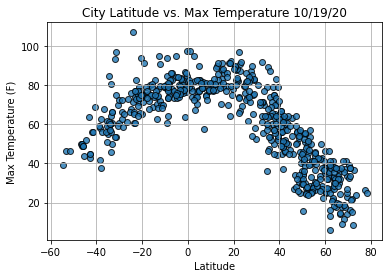

In [41]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()


In [ ]:
# Build the scatter plot for latitude vs. Humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig2.png")

# Show plot.
plt.show()